In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

from source.models import AE_ReLU, AE_Sigm, AE_ReLU_Small
from source.data import get_train_test_dataloaders
from source.eval import reconstruction_loss

from functools import partial
import copy
import math
import gc
from tqdm import tqdm
# from multiprocessing import Pool
import torch.multiprocessing as mp
from collections import OrderedDict

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = 'cpu'
device = 'cuda'

/trinity/home/daria.cherniuk/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def plot_progress(x, z):
    rows = 2
    cols = 16
    x, z = x[:cols], z[:cols]
    fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(cols, rows))
    for i in range(len(x)):
        # ax[i//cols, i%cols].imshow(x[i].cpu().reshape([16, 16]), 'gray')
        # ax[i//cols, i%cols].set_axis_off()
        ax[0, i].imshow(x[i].cpu().reshape([16, 16]), 'gray')
        ax[0, i].set_axis_off()
    for i in range(len(z)):
        # ax[i//cols+2, i%cols].imshow(z[i].detach().cpu().numpy().reshape([16, 16]), 'gray')
        # ax[i//cols+2, i%cols].set_axis_off()
        ax[1, i].imshow(z[i].detach().cpu().numpy().reshape([16, 16]), 'gray')
        ax[1, i].set_axis_off()
    plt.show()

In [4]:
train_loader, test_loader = get_train_test_dataloaders('..', 'USPS', batch_size=32)

Random-initialized model loss: 0.16256071627140045


100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

Layer 0, W Diff Norm (%): inf
Layer 0, Z Diff Norm (%): 0.2609356939792633
Layer 0, A Diff Norm (%): 0.7075003981590271
Layer 1, W Diff Norm (%): inf
Layer 1, Z Diff Norm (%): 0.24966274201869965
Layer 1, A Diff Norm (%): 0.7073914408683777
Layer 2, W Diff Norm (%): inf
Layer 2, Z Diff Norm (%): 0.25559335947036743
Layer 2, A Diff Norm (%): 0.7064971327781677
Layer 3, W Diff Norm (%): inf
Layer 3, Z Diff Norm (%): 0.8371040225028992


Epoch 1, Eval loss: 0.1421038806438446


100%|██████████| 4/4 [00:00<00:00, 79.71it/s]

Layer 0, W Diff Norm (%): 0.0007799435988999903
Layer 0, Z Diff Norm (%): 0.14375345408916473
Layer 0, A Diff Norm (%): 0.2564641237258911
Layer 1, W Diff Norm (%): 1.397751808166504
Layer 1, Z Diff Norm (%): 0.1377275139093399
Layer 1, A Diff Norm (%): 0.24778024852275848
Layer 2, W Diff Norm (%): 0.4100895822048187
Layer 2, Z Diff Norm (%): 0.2364216297864914
Layer 2, A Diff Norm (%): 0.430121511220932
Layer 3, W Diff Norm (%): 4.66874361038208
Layer 3, Z Diff Norm (%): 0.008511136285960674


Epoch 2, Eval loss: 0.10351564735174179


100%|██████████| 4/4 [00:00<00:00, 53.14it/s]

Layer 0, W Diff Norm (%): 0.014895506203174591
Layer 0, Z Diff Norm (%): 0.0744282528758049
Layer 0, A Diff Norm (%): 0.1437538117170334
Layer 1, W Diff Norm (%): 1.15744149684906
Layer 1, Z Diff Norm (%): 0.09515338391065598
Layer 1, A Diff Norm (%): 0.1971505731344223
Layer 2, W Diff Norm (%): 0.5457707643508911
Layer 2, Z Diff Norm (%): 0.1560794562101364
Layer 2, A Diff Norm (%): 0.3688889443874359
Layer 3, W Diff Norm (%): 0.5880215167999268
Layer 3, Z Diff Norm (%): 0.004445197526365519


Epoch 3, Eval loss: 0.08818697929382324


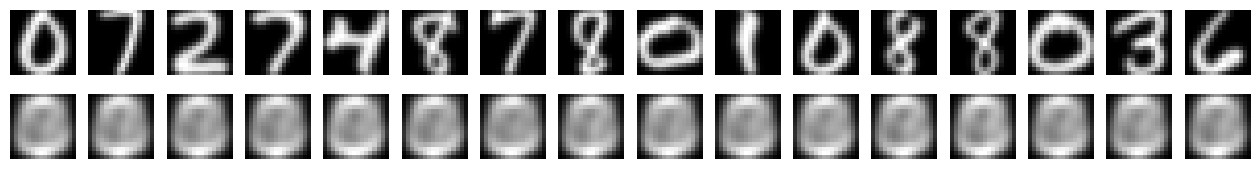

100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

Layer 0, W Diff Norm (%): 0.016916336491703987
Layer 0, Z Diff Norm (%): 0.03961531072854996
Layer 0, A Diff Norm (%): 0.0783323273062706
Layer 1, W Diff Norm (%): 0.46006011962890625
Layer 1, Z Diff Norm (%): 0.06269614398479462
Layer 1, A Diff Norm (%): 0.09160395711660385
Layer 2, W Diff Norm (%): 0.636307418346405
Layer 2, Z Diff Norm (%): 0.06802033632993698
Layer 2, A Diff Norm (%): 0.11438960582017899
Layer 3, W Diff Norm (%): 0.40044260025024414
Layer 3, Z Diff Norm (%): 0.0012032146332785487


Epoch 4, Eval loss: 0.0771876871585846


100%|██████████| 4/4 [00:00<00:00, 10.37it/s]

Layer 0, W Diff Norm (%): 0.023543504998087883
Layer 0, Z Diff Norm (%): 0.021575184538960457
Layer 0, A Diff Norm (%): 0.04081413894891739
Layer 1, W Diff Norm (%): 0.2886834144592285
Layer 1, Z Diff Norm (%): 0.05498594418168068
Layer 1, A Diff Norm (%): 0.07699104398488998
Layer 2, W Diff Norm (%): 0.43074703216552734
Layer 2, Z Diff Norm (%): 0.0445224829018116
Layer 2, A Diff Norm (%): 0.05571915581822395
Layer 3, W Diff Norm (%): 0.3097279965877533
Layer 3, Z Diff Norm (%): 0.000582945707719773


Epoch 5, Eval loss: 0.07036194950342178


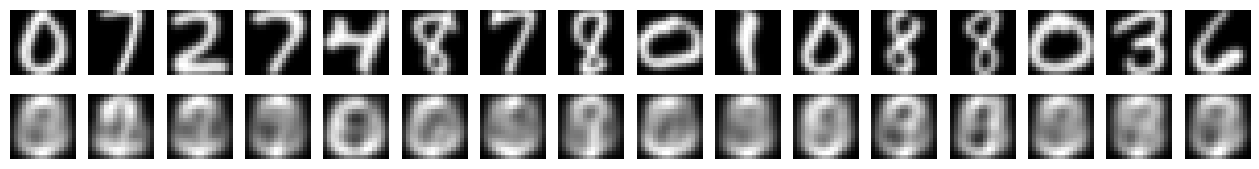

100%|██████████| 4/4 [00:00<00:00, 105.58it/s]

Layer 0, W Diff Norm (%): 0.026484467089176178
Layer 0, Z Diff Norm (%): 0.013489671051502228
Layer 0, A Diff Norm (%): 0.023318320512771606
Layer 1, W Diff Norm (%): 0.21012087166309357
Layer 1, Z Diff Norm (%): 0.049658190459012985
Layer 1, A Diff Norm (%): 0.05719362571835518
Layer 2, W Diff Norm (%): 0.250071257352829
Layer 2, Z Diff Norm (%): 0.03186403214931488
Layer 2, A Diff Norm (%): 0.029539046809077263
Layer 3, W Diff Norm (%): 0.14711110293865204
Layer 3, Z Diff Norm (%): 0.0002616678539197892


Epoch 6, Eval loss: 0.06115557998418808


100%|██████████| 4/4 [00:00<00:00, 105.65it/s]

Layer 0, W Diff Norm (%): 0.027605677023530006
Layer 0, Z Diff Norm (%): 0.010060261003673077
Layer 0, A Diff Norm (%): 0.014971783384680748
Layer 1, W Diff Norm (%): 0.15213114023208618
Layer 1, Z Diff Norm (%): 0.04168523848056793
Layer 1, A Diff Norm (%): 0.03892296180129051
Layer 2, W Diff Norm (%): 0.14475145936012268
Layer 2, Z Diff Norm (%): 0.02293756790459156
Layer 2, A Diff Norm (%): 0.019157694652676582
Layer 3, W Diff Norm (%): 0.10181894898414612
Layer 3, Z Diff Norm (%): 0.00011679398448904976


Epoch 7, Eval loss: 0.048716623336076736


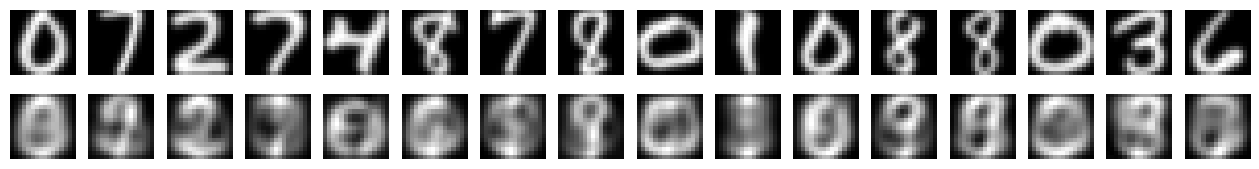

100%|██████████| 4/4 [00:00<00:00, 105.23it/s]

Layer 0, W Diff Norm (%): 0.028333289548754692
Layer 0, Z Diff Norm (%): 0.007975079119205475
Layer 0, A Diff Norm (%): 0.010239037685096264
Layer 1, W Diff Norm (%): 0.10757219046354294
Layer 1, Z Diff Norm (%): 0.033141061663627625
Layer 1, A Diff Norm (%): 0.02658689208328724
Layer 2, W Diff Norm (%): 0.08818338066339493
Layer 2, Z Diff Norm (%): 0.01671903021633625
Layer 2, A Diff Norm (%): 0.015021944418549538
Layer 3, W Diff Norm (%): 0.0842135101556778
Layer 3, Z Diff Norm (%): 8.609166252426803e-05


Epoch 8, Eval loss: 0.03603171929717064


100%|██████████| 4/4 [00:00<00:00, 106.30it/s]

Layer 0, W Diff Norm (%): 0.027676673606038094
Layer 0, Z Diff Norm (%): 0.0062252795323729515
Layer 0, A Diff Norm (%): 0.007214149925857782
Layer 1, W Diff Norm (%): 0.07503770291805267
Layer 1, Z Diff Norm (%): 0.025655969977378845
Layer 1, A Diff Norm (%): 0.018915200605988503
Layer 2, W Diff Norm (%): 0.055567916482686996
Layer 2, Z Diff Norm (%): 0.012369154021143913
Layer 2, A Diff Norm (%): 0.011910388246178627
Layer 3, W Diff Norm (%): 0.0729827806353569
Layer 3, Z Diff Norm (%): 6.533187843160704e-05


Epoch 9, Eval loss: 0.02607797458767891


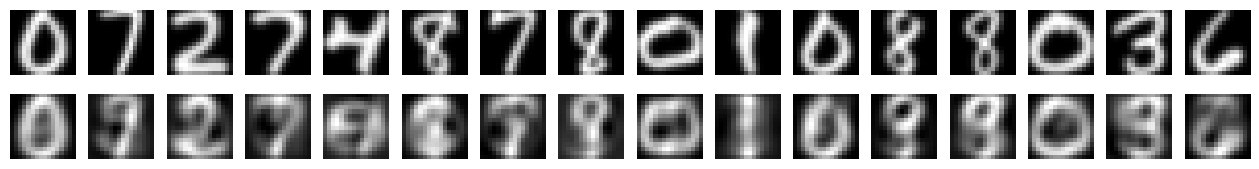

100%|██████████| 4/4 [00:00<00:00, 106.08it/s]

Layer 0, W Diff Norm (%): 0.025481440126895905
Layer 0, Z Diff Norm (%): 0.004753874149173498
Layer 0, A Diff Norm (%): 0.00519598601385951
Layer 1, W Diff Norm (%): 0.05247151851654053
Layer 1, Z Diff Norm (%): 0.01968296989798546
Layer 1, A Diff Norm (%): 0.014027221128344536
Layer 2, W Diff Norm (%): 0.03602520376443863
Layer 2, Z Diff Norm (%): 0.009547227062284946
Layer 2, A Diff Norm (%): 0.009988018311560154
Layer 3, W Diff Norm (%): 0.06578205525875092
Layer 3, Z Diff Norm (%): 5.583690290222876e-05


Epoch 10, Eval loss: 0.019327640533447266


100%|██████████| 4/4 [00:00<00:00, 105.56it/s]

Layer 0, W Diff Norm (%): 0.022362669929862022
Layer 0, Z Diff Norm (%): 0.0035764011554419994
Layer 0, A Diff Norm (%): 0.00383932632394135
Layer 1, W Diff Norm (%): 0.03732365742325783
Layer 1, Z Diff Norm (%): 0.01513918861746788
Layer 1, A Diff Norm (%): 0.010776523500680923
Layer 2, W Diff Norm (%): 0.024079183116555214
Layer 2, Z Diff Norm (%): 0.007622272241860628
Layer 2, A Diff Norm (%): 0.008476614952087402
Layer 3, W Diff Norm (%): 0.05962245166301727
Layer 3, Z Diff Norm (%): 4.9434056563768536e-05


Epoch 11, Eval loss: 0.015188497491180897


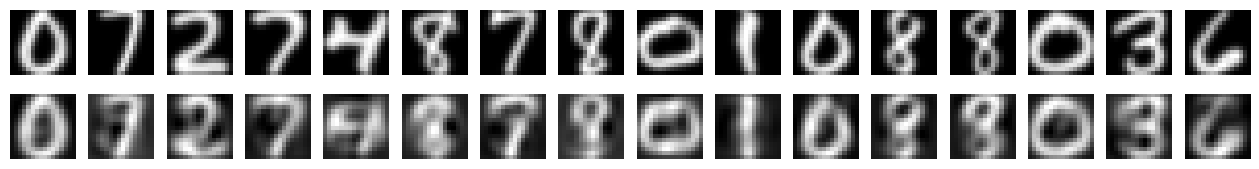

100%|██████████| 4/4 [00:00<00:00, 105.32it/s]

Layer 0, W Diff Norm (%): 0.018994208425283432
Layer 0, Z Diff Norm (%): 0.0027131065726280212
Layer 0, A Diff Norm (%): 0.0029230357613414526
Layer 1, W Diff Norm (%): 0.027676662430167198
Layer 1, Z Diff Norm (%): 0.011770390905439854
Layer 1, A Diff Norm (%): 0.00851797591894865
Layer 2, W Diff Norm (%): 0.016630079597234726
Layer 2, Z Diff Norm (%): 0.0061890240758657455
Layer 2, A Diff Norm (%): 0.0071462723426520824
Layer 3, W Diff Norm (%): 0.05390804260969162
Layer 3, Z Diff Norm (%): 4.291307050152682e-05


Epoch 12, Eval loss: 0.01275334507226944


100%|██████████| 4/4 [00:00<00:00, 105.35it/s]

Layer 0, W Diff Norm (%): 0.01578664407134056
Layer 0, Z Diff Norm (%): 0.0020878901705145836
Layer 0, A Diff Norm (%): 0.002290639327839017
Layer 1, W Diff Norm (%): 0.021511370316147804
Layer 1, Z Diff Norm (%): 0.009253469295799732
Layer 1, A Diff Norm (%): 0.0068459585309028625
Layer 2, W Diff Norm (%): 0.011862620711326599
Layer 2, Z Diff Norm (%): 0.005086084827780724
Layer 2, A Diff Norm (%): 0.006073964759707451
Layer 3, W Diff Norm (%): 0.049044303596019745
Layer 3, Z Diff Norm (%): 3.678415305330418e-05


Epoch 13, Eval loss: 0.011309384368360043


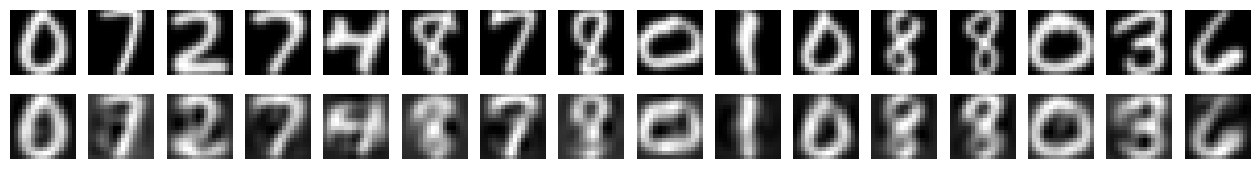

100%|██████████| 4/4 [00:00<00:00, 105.41it/s]

Layer 0, W Diff Norm (%): 0.012971666641533375
Layer 0, Z Diff Norm (%): 0.0016525763785466552
Layer 0, A Diff Norm (%): 0.0018351690378040075
Layer 1, W Diff Norm (%): 0.017710359767079353
Layer 1, Z Diff Norm (%): 0.007355549372732639
Layer 1, A Diff Norm (%): 0.005546605680137873
Layer 2, W Diff Norm (%): 0.008735970593988895
Layer 2, Z Diff Norm (%): 0.004178449045866728
Layer 2, A Diff Norm (%): 0.005096305627375841
Layer 3, W Diff Norm (%): 0.04434387758374214
Layer 3, Z Diff Norm (%): 3.074777123401873e-05


Epoch 14, Eval loss: 0.010427162051200867


100%|██████████| 4/4 [00:00<00:00, 105.18it/s]

Layer 0, W Diff Norm (%): 0.010608435608446598
Layer 0, Z Diff Norm (%): 0.0013491598656401038
Layer 0, A Diff Norm (%): 0.0015266711125150323
Layer 1, W Diff Norm (%): 0.015965837985277176
Layer 1, Z Diff Norm (%): 0.0059009031392633915
Layer 1, A Diff Norm (%): 0.004507162142544985
Layer 2, W Diff Norm (%): 0.006609340198338032
Layer 2, Z Diff Norm (%): 0.003389783436432481
Layer 2, A Diff Norm (%): 0.004232508130371571
Layer 3, W Diff Norm (%): 0.04021464288234711
Layer 3, Z Diff Norm (%): 2.4625884179840796e-05


Epoch 15, Eval loss: 0.009866805747151375


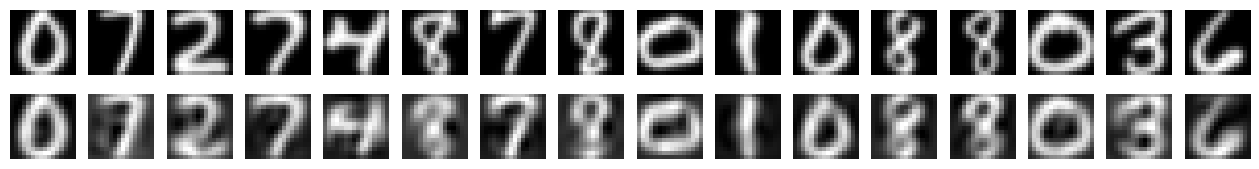

100%|██████████| 4/4 [00:00<00:00, 105.73it/s]

Layer 0, W Diff Norm (%): 0.008668584749102592
Layer 0, Z Diff Norm (%): 0.0011164025636389852
Layer 0, A Diff Norm (%): 0.0013365655904635787
Layer 1, W Diff Norm (%): 0.014269113540649414
Layer 1, Z Diff Norm (%): 0.00474482960999012
Layer 1, A Diff Norm (%): 0.0036237132735550404
Layer 2, W Diff Norm (%): 0.005115166772156954
Layer 2, Z Diff Norm (%): 0.002765739569440484
Layer 2, A Diff Norm (%): 0.003587138606235385
Layer 3, W Diff Norm (%): 0.03679230436682701
Layer 3, Z Diff Norm (%): 2.0543702703434974e-05


Epoch 16, Eval loss: 0.009501525200903416


100%|██████████| 4/4 [00:00<00:00, 105.43it/s]

Layer 0, W Diff Norm (%): 0.007064231671392918
Layer 0, Z Diff Norm (%): 0.0009528366499580443
Layer 0, A Diff Norm (%): 0.001149481744505465
Layer 1, W Diff Norm (%): 0.01356660109013319
Layer 1, Z Diff Norm (%): 0.0038196290843188763
Layer 1, A Diff Norm (%): 0.002896610414609313
Layer 2, W Diff Norm (%): 0.004050990100950003
Layer 2, Z Diff Norm (%): 0.0023049088194966316
Layer 2, A Diff Norm (%): 0.0031405133195221424
Layer 3, W Diff Norm (%): 0.03410398215055466
Layer 3, Z Diff Norm (%): 1.7885644410853274e-05


Epoch 17, Eval loss: 0.009250616654753685


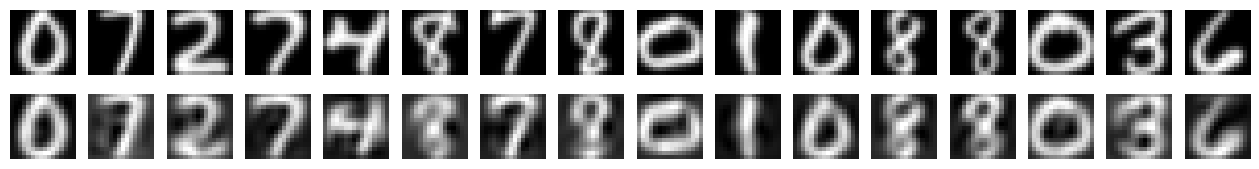

100%|██████████| 4/4 [00:00<00:00, 105.91it/s]

Layer 0, W Diff Norm (%): 0.005785095971077681
Layer 0, Z Diff Norm (%): 0.0008345875539816916
Layer 0, A Diff Norm (%): 0.001025587203912437
Layer 1, W Diff Norm (%): 0.012716528959572315
Layer 1, Z Diff Norm (%): 0.003090410027652979
Layer 1, A Diff Norm (%): 0.0023173040244728327
Layer 2, W Diff Norm (%): 0.003262273268774152
Layer 2, Z Diff Norm (%): 0.001964644296094775
Layer 2, A Diff Norm (%): 0.00280884956009686
Layer 3, W Diff Norm (%): 0.03185596317052841
Layer 3, Z Diff Norm (%): 1.823480852181092e-05


Epoch 18, Eval loss: 0.009077242575585842


100%|██████████| 4/4 [00:00<00:00, 105.50it/s]

Layer 0, W Diff Norm (%): 0.0047414046712219715
Layer 0, Z Diff Norm (%): 0.0007587493164464831
Layer 0, A Diff Norm (%): 0.000950171030126512
Layer 1, W Diff Norm (%): 0.012191560119390488
Layer 1, Z Diff Norm (%): 0.002506272168830037
Layer 1, A Diff Norm (%): 0.0018747097346931696
Layer 2, W Diff Norm (%): 0.002687737811356783
Layer 2, Z Diff Norm (%): 0.0017207794589921832
Layer 2, A Diff Norm (%): 0.0025684782303869724
Layer 3, W Diff Norm (%): 0.029915811493992805
Layer 3, Z Diff Norm (%): 1.707950468698982e-05


Epoch 19, Eval loss: 0.008953387849032879


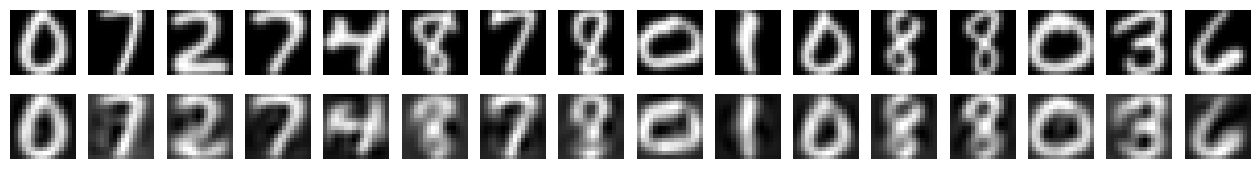

100%|██████████| 4/4 [00:00<00:00, 105.52it/s]

Layer 0, W Diff Norm (%): 0.0038868458941578865
Layer 0, Z Diff Norm (%): 0.0006962832994759083
Layer 0, A Diff Norm (%): 0.0008816145709715784
Layer 1, W Diff Norm (%): 0.011240817606449127
Layer 1, Z Diff Norm (%): 0.00207067234441638
Layer 1, A Diff Norm (%): 0.0015425360761582851
Layer 2, W Diff Norm (%): 0.002248421311378479
Layer 2, Z Diff Norm (%): 0.001507669105194509
Layer 2, A Diff Norm (%): 0.002333636162802577
Layer 3, W Diff Norm (%): 0.028347255662083626
Layer 3, Z Diff Norm (%): 1.6338995919795707e-05


Epoch 20, Eval loss: 0.008860556408762932


100%|██████████| 4/4 [00:00<00:00, 104.99it/s]

Layer 0, W Diff Norm (%): 0.00320565071888268
Layer 0, Z Diff Norm (%): 0.0006662164814770222
Layer 0, A Diff Norm (%): 0.0009025763720273972
Layer 1, W Diff Norm (%): 0.01157403364777565
Layer 1, Z Diff Norm (%): 0.001743800938129425
Layer 1, A Diff Norm (%): 0.0012804092839360237
Layer 2, W Diff Norm (%): 0.0018909869249910116
Layer 2, Z Diff Norm (%): 0.001369642443023622
Layer 2, A Diff Norm (%): 0.0021638176403939724
Layer 3, W Diff Norm (%): 0.02699463628232479
Layer 3, Z Diff Norm (%): 1.7565771486260928e-05


Epoch 21, Eval loss: 0.008793461136519909


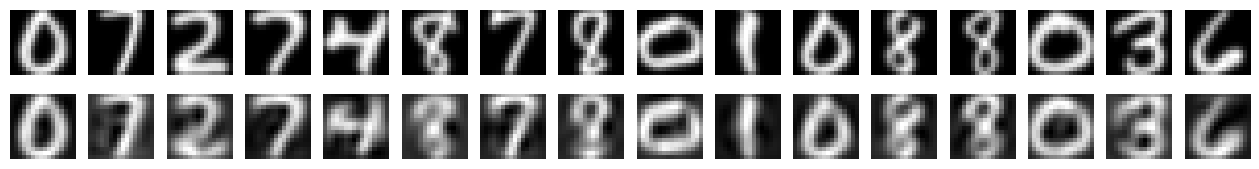

100%|██████████| 4/4 [00:00<00:00, 105.61it/s]

Layer 0, W Diff Norm (%): 0.002657821401953697
Layer 0, Z Diff Norm (%): 0.0006279076915234327
Layer 0, A Diff Norm (%): 0.0008099075057543814
Layer 1, W Diff Norm (%): 0.010693893767893314
Layer 1, Z Diff Norm (%): 0.0014684954658150673
Layer 1, A Diff Norm (%): 0.0010920095955953002
Layer 2, W Diff Norm (%): 0.0016196954529732466
Layer 2, Z Diff Norm (%): 0.0012574070133268833
Layer 2, A Diff Norm (%): 0.002011502394452691
Layer 3, W Diff Norm (%): 0.02580353245139122
Layer 3, Z Diff Norm (%): 1.5041900951473508e-05


Epoch 22, Eval loss: 0.008745348080992699


100%|██████████| 4/4 [00:00<00:00, 105.24it/s]

Layer 0, W Diff Norm (%): 0.002205453347414732
Layer 0, Z Diff Norm (%): 0.0006208271952345967
Layer 0, A Diff Norm (%): 0.0008096826495602727
Layer 1, W Diff Norm (%): 0.0100780064240098
Layer 1, Z Diff Norm (%): 0.0012886099284514785
Layer 1, A Diff Norm (%): 0.0009385007433593273
Layer 2, W Diff Norm (%): 0.0014053594786673784
Layer 2, Z Diff Norm (%): 0.0011651900131255388
Layer 2, A Diff Norm (%): 0.0018849779153242707
Layer 3, W Diff Norm (%): 0.024629224091768265
Layer 3, Z Diff Norm (%): 0.0002950940979644656


Epoch 23, Eval loss: 0.008709459565579891


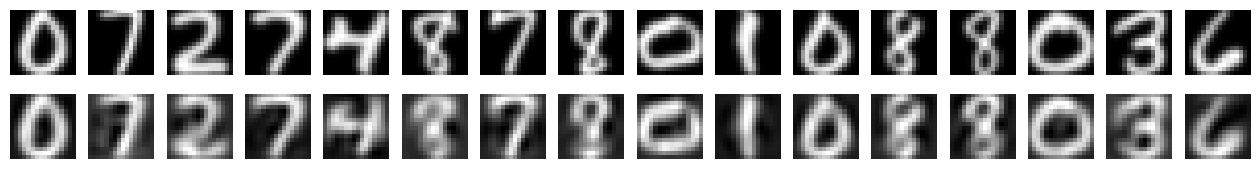

100%|██████████| 4/4 [00:00<00:00, 105.89it/s]

Layer 0, W Diff Norm (%): 0.0018629217520356178
Layer 0, Z Diff Norm (%): 0.0005814600735902786
Layer 0, A Diff Norm (%): 0.0008471373002976179
Layer 1, W Diff Norm (%): 0.010063434951007366
Layer 1, Z Diff Norm (%): 0.0010743549792096019
Layer 1, A Diff Norm (%): 0.0008380195358768106
Layer 2, W Diff Norm (%): 0.0012319717789068818
Layer 2, Z Diff Norm (%): 0.0010812901891767979
Layer 2, A Diff Norm (%): 0.0017651153029873967
Layer 3, W Diff Norm (%): 0.023481784388422966
Layer 3, Z Diff Norm (%): 0.0002920214319601655


Epoch 24, Eval loss: 0.008672886528074741


100%|██████████| 4/4 [00:00<00:00, 106.58it/s]

Layer 0, W Diff Norm (%): 0.0015842783031985164
Layer 0, Z Diff Norm (%): 0.000560948858037591
Layer 0, A Diff Norm (%): 0.0007197237573564053
Layer 1, W Diff Norm (%): 0.00938464142382145
Layer 1, Z Diff Norm (%): 0.0010546124540269375
Layer 1, A Diff Norm (%): 0.0007476474856957793
Layer 2, W Diff Norm (%): 0.001092195394448936
Layer 2, Z Diff Norm (%): 0.0010090392315760255
Layer 2, A Diff Norm (%): 0.0016567213460803032
Layer 3, W Diff Norm (%): 0.022408030927181244
Layer 3, Z Diff Norm (%): 0.0002890543546527624


Epoch 25, Eval loss: 0.008647757582366467


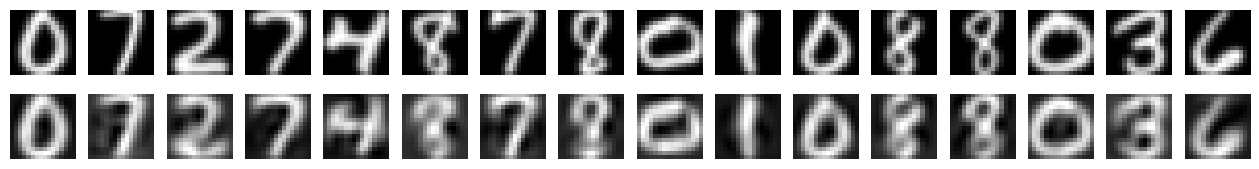

100%|██████████| 4/4 [00:00<00:00, 105.61it/s]

Layer 0, W Diff Norm (%): 0.0013871495611965656
Layer 0, Z Diff Norm (%): 0.0005662504700012505
Layer 0, A Diff Norm (%): 0.0007076467154547572
Layer 1, W Diff Norm (%): 0.009269321337342262
Layer 1, Z Diff Norm (%): 0.0009024630999192595
Layer 1, A Diff Norm (%): 0.000676495663356036
Layer 2, W Diff Norm (%): 0.0009673347231000662
Layer 2, Z Diff Norm (%): 0.0009487643255852163
Layer 2, A Diff Norm (%): 0.0015579218743368983
Layer 3, W Diff Norm (%): 0.021366989240050316
Layer 3, Z Diff Norm (%): 0.00028609338914975524


Epoch 26, Eval loss: 0.008628539741039276


100%|██████████| 4/4 [00:00<00:00, 105.41it/s]

Layer 0, W Diff Norm (%): 0.0012170071713626385
Layer 0, Z Diff Norm (%): 0.0005521802231669426
Layer 0, A Diff Norm (%): 0.0007763547473587096
Layer 1, W Diff Norm (%): 0.009318049997091293
Layer 1, Z Diff Norm (%): 0.000846109411213547
Layer 1, A Diff Norm (%): 0.0006072985706850886
Layer 2, W Diff Norm (%): 0.0008673747070133686
Layer 2, Z Diff Norm (%): 0.0008735079900361598
Layer 2, A Diff Norm (%): 0.0014620479196310043
Layer 3, W Diff Norm (%): 0.020341824740171432
Layer 3, Z Diff Norm (%): 0.0002832117024809122


Epoch 27, Eval loss: 0.008608352392911911


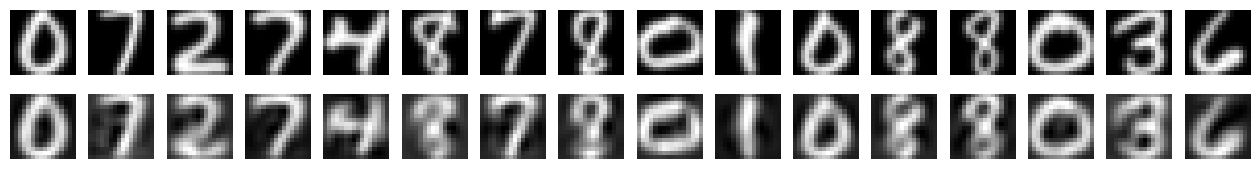

100%|██████████| 4/4 [00:00<00:00, 105.40it/s]

Layer 0, W Diff Norm (%): 0.0011186037445440888
Layer 0, Z Diff Norm (%): 0.000520859903190285
Layer 0, A Diff Norm (%): 0.0007373145199380815
Layer 1, W Diff Norm (%): 0.008408655412495136
Layer 1, Z Diff Norm (%): 0.0007782974280416965
Layer 1, A Diff Norm (%): 0.0005559935816563666
Layer 2, W Diff Norm (%): 0.0007910217391327024
Layer 2, Z Diff Norm (%): 0.0008257004083134234
Layer 2, A Diff Norm (%): 0.0013765622861683369
Layer 3, W Diff Norm (%): 0.01944594457745552
Layer 3, Z Diff Norm (%): 0.000280408828984946


Epoch 28, Eval loss: 0.00859333761036396


100%|██████████| 4/4 [00:00<00:00, 105.83it/s]

Layer 0, W Diff Norm (%): 0.0010295173851773143
Layer 0, Z Diff Norm (%): 0.0005545788444578648
Layer 0, A Diff Norm (%): 0.000743505428545177
Layer 1, W Diff Norm (%): 0.008192356675863266
Layer 1, Z Diff Norm (%): 0.0007381409523077309
Layer 1, A Diff Norm (%): 0.0005273061105981469
Layer 2, W Diff Norm (%): 0.0007293869275599718
Layer 2, Z Diff Norm (%): 0.0007944275857880712
Layer 2, A Diff Norm (%): 0.0013123047538101673
Layer 3, W Diff Norm (%): 0.018638942390680313
Layer 3, Z Diff Norm (%): 0.0002777648332994431


Epoch 29, Eval loss: 0.008582166396081448


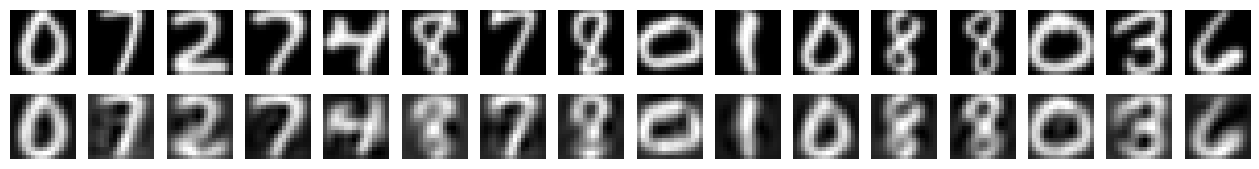

100%|██████████| 4/4 [00:00<00:00, 106.61it/s]

Layer 0, W Diff Norm (%): 0.0009675909532234073
Layer 0, Z Diff Norm (%): 0.0005467170267365873
Layer 0, A Diff Norm (%): 0.0007382489275187254
Layer 1, W Diff Norm (%): 0.008361214771866798
Layer 1, Z Diff Norm (%): 0.0006748987943865359
Layer 1, A Diff Norm (%): 0.00048266444355249405
Layer 2, W Diff Norm (%): 0.0006587131647393107
Layer 2, Z Diff Norm (%): 0.0007477427716366947
Layer 2, A Diff Norm (%): 0.001312279375270009
Layer 3, W Diff Norm (%): 0.017888149246573448
Layer 3, Z Diff Norm (%): 0.00027492293156683445


Epoch 30, Eval loss: 0.008572735823690891


100%|██████████| 4/4 [00:00<00:00, 105.34it/s]

Layer 0, W Diff Norm (%): 0.0009234527824446559
Layer 0, Z Diff Norm (%): 0.0005334530142135918
Layer 0, A Diff Norm (%): 0.0007277060649357736
Layer 1, W Diff Norm (%): 0.008034048601984978
Layer 1, Z Diff Norm (%): 0.0006819895352236927
Layer 1, A Diff Norm (%): 0.0004653336654882878
Layer 2, W Diff Norm (%): 0.0006035083788447082
Layer 2, Z Diff Norm (%): 0.0007060226635076106
Layer 2, A Diff Norm (%): 0.0012228434206917882
Layer 3, W Diff Norm (%): 0.017237834632396698
Layer 3, Z Diff Norm (%): 0.00027239066548645496


Epoch 31, Eval loss: 0.008565698750317097


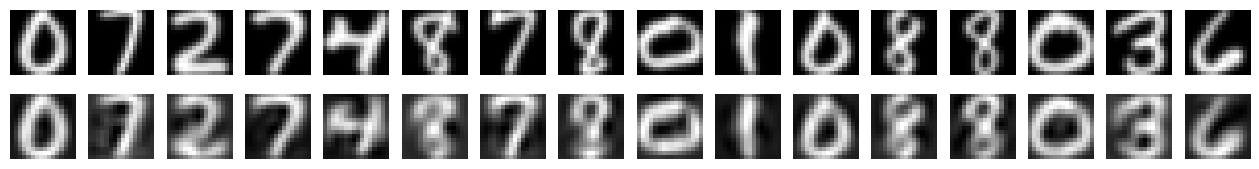

100%|██████████| 4/4 [00:00<00:00, 106.45it/s]

Layer 0, W Diff Norm (%): 0.0008784239762462676
Layer 0, Z Diff Norm (%): 0.0005231301765888929
Layer 0, A Diff Norm (%): 0.0007215907098725438
Layer 1, W Diff Norm (%): 0.00809534452855587
Layer 1, Z Diff Norm (%): 0.0006298615480773151
Layer 1, A Diff Norm (%): 0.0004428648389875889
Layer 2, W Diff Norm (%): 0.000566094066016376
Layer 2, Z Diff Norm (%): 0.0007421578629873693
Layer 2, A Diff Norm (%): 0.0012550604296848178
Layer 3, W Diff Norm (%): 0.016626844182610512
Layer 3, Z Diff Norm (%): 0.00026952457847073674


Epoch 32, Eval loss: 0.008554446510970592


100%|██████████| 4/4 [00:00<00:00, 104.94it/s]

Layer 0, W Diff Norm (%): 0.0008674786658957601
Layer 0, Z Diff Norm (%): 0.000521975161973387
Layer 0, A Diff Norm (%): 0.0006915269186720252
Layer 1, W Diff Norm (%): 0.0076498533599078655
Layer 1, Z Diff Norm (%): 0.0006045009940862656
Layer 1, A Diff Norm (%): 0.0004655115189962089
Layer 2, W Diff Norm (%): 0.000531147641595453
Layer 2, Z Diff Norm (%): 0.000632135255727917
Layer 2, A Diff Norm (%): 0.0011006506392732263
Layer 3, W Diff Norm (%): 0.016076384112238884
Layer 3, Z Diff Norm (%): 0.00026677458663471043


Epoch 33, Eval loss: 0.008548489771783352


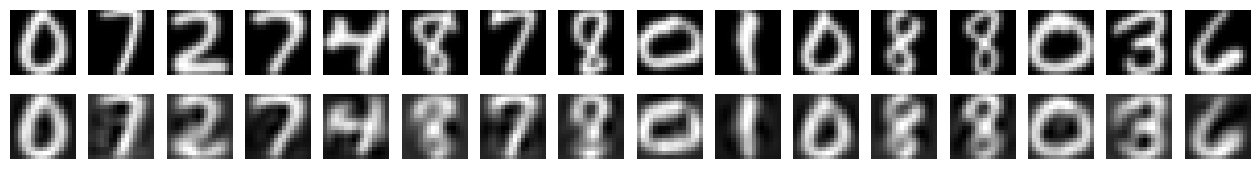

100%|██████████| 4/4 [00:00<00:00, 105.95it/s]

Layer 0, W Diff Norm (%): 0.0008535993983969092
Layer 0, Z Diff Norm (%): 0.0005200983141548932
Layer 0, A Diff Norm (%): 0.0007338941795751452
Layer 1, W Diff Norm (%): 0.007513099350035191
Layer 1, Z Diff Norm (%): 0.0006863228045403957
Layer 1, A Diff Norm (%): 0.0003747640294022858
Layer 2, W Diff Norm (%): 0.000503587769344449
Layer 2, Z Diff Norm (%): 0.000601584673859179
Layer 2, A Diff Norm (%): 0.001036698929965496
Layer 3, W Diff Norm (%): 0.015493054874241352
Layer 3, Z Diff Norm (%): 0.0002641897590365261


Epoch 34, Eval loss: 0.008542985655367374


100%|██████████| 4/4 [00:00<00:00, 105.51it/s]

Layer 0, W Diff Norm (%): 0.0008325815433636308
Layer 0, Z Diff Norm (%): 0.0005341185024008155
Layer 0, A Diff Norm (%): 0.0007394605199806392
Layer 1, W Diff Norm (%): 0.00756887998431921
Layer 1, Z Diff Norm (%): 0.0006323849083855748
Layer 1, A Diff Norm (%): 0.0003611941065173596
Layer 2, W Diff Norm (%): 0.00047659268602728844
Layer 2, Z Diff Norm (%): 0.0006022464949637651
Layer 2, A Diff Norm (%): 0.001003551995381713
Layer 3, W Diff Norm (%): 0.015040558762848377
Layer 3, Z Diff Norm (%): 0.00026159503613598645


Epoch 35, Eval loss: 0.008535751141607761


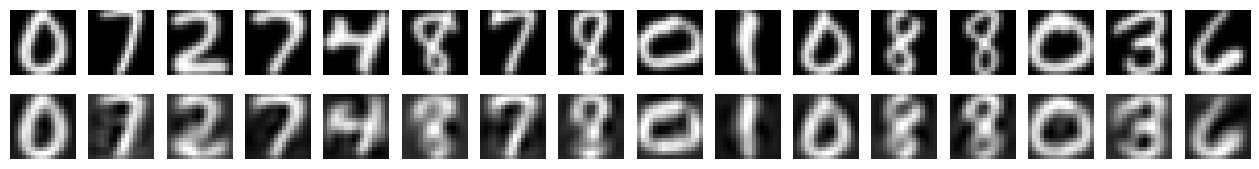

100%|██████████| 4/4 [00:00<00:00, 105.80it/s]

Layer 0, W Diff Norm (%): 0.0008341009961441159
Layer 0, Z Diff Norm (%): 0.0005270940018817782
Layer 0, A Diff Norm (%): 0.000732403073925525
Layer 1, W Diff Norm (%): 0.006671390496194363
Layer 1, Z Diff Norm (%): 0.0005773974698968232
Layer 1, A Diff Norm (%): 0.0003505920176394284
Layer 2, W Diff Norm (%): 0.00045483652502298355
Layer 2, Z Diff Norm (%): 0.000593833567108959
Layer 2, A Diff Norm (%): 0.0009881961159408092
Layer 3, W Diff Norm (%): 0.014591575600206852
Layer 3, Z Diff Norm (%): 0.00025899751926772296


Epoch 36, Eval loss: 0.008532710373401642


100%|██████████| 4/4 [00:00<00:00, 102.40it/s]

Layer 0, W Diff Norm (%): 0.0008214946719817817
Layer 0, Z Diff Norm (%): 0.0005445550195872784
Layer 0, A Diff Norm (%): 0.0007098595960997045
Layer 1, W Diff Norm (%): 0.0064738779328763485
Layer 1, Z Diff Norm (%): 0.000639451143797487
Layer 1, A Diff Norm (%): 0.0003607995458878577
Layer 2, W Diff Norm (%): 0.00043770746560767293
Layer 2, Z Diff Norm (%): 0.000547878909856081
Layer 2, A Diff Norm (%): 0.0009239876526407897
Layer 3, W Diff Norm (%): 0.014214635826647282
Layer 3, Z Diff Norm (%): 0.00025642727268859744


Epoch 37, Eval loss: 0.008526663295924664


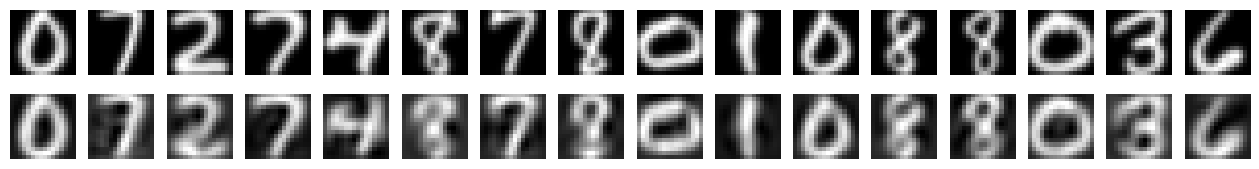

100%|██████████| 4/4 [00:00<00:00, 104.10it/s]

Layer 0, W Diff Norm (%): 0.0008168530184775591
Layer 0, Z Diff Norm (%): 0.0005585179897025228
Layer 0, A Diff Norm (%): 0.000732152839191258
Layer 1, W Diff Norm (%): 0.006539869122207165
Layer 1, Z Diff Norm (%): 0.0005850719753652811
Layer 1, A Diff Norm (%): 0.000333903735736385
Layer 2, W Diff Norm (%): 0.000414410256780684
Layer 2, Z Diff Norm (%): 0.0005262051126919687
Layer 2, A Diff Norm (%): 0.0008873390615917742
Layer 3, W Diff Norm (%): 0.013824795372784138
Layer 3, Z Diff Norm (%): 0.00025395231205038726


Epoch 38, Eval loss: 0.008522936142981052


100%|██████████| 4/4 [00:00<00:00, 99.63it/s]

Layer 0, W Diff Norm (%): 0.0008233918924815953
Layer 0, Z Diff Norm (%): 0.0005318616749718785
Layer 0, A Diff Norm (%): 0.0007390043465420604
Layer 1, W Diff Norm (%): 0.006188632920384407
Layer 1, Z Diff Norm (%): 0.0006075991550460458
Layer 1, A Diff Norm (%): 0.0003267074644099921
Layer 2, W Diff Norm (%): 0.0004036540922243148
Layer 2, Z Diff Norm (%): 0.0005103687290102243
Layer 2, A Diff Norm (%): 0.0008684576023370028
Layer 3, W Diff Norm (%): 0.013380142860114574
Layer 3, Z Diff Norm (%): 0.000251452176598832


Epoch 39, Eval loss: 0.008518405258655548


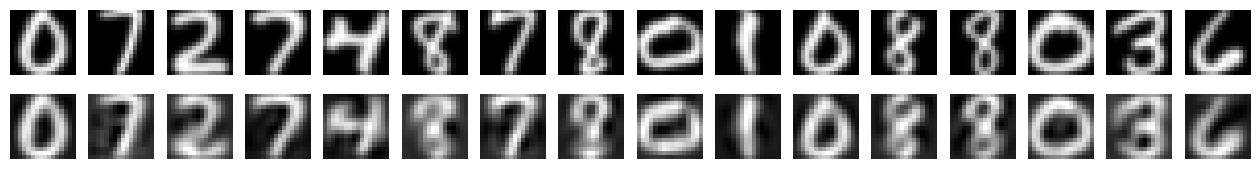

100%|██████████| 4/4 [00:00<00:00, 105.34it/s]

Layer 0, W Diff Norm (%): 0.000831191660836339
Layer 0, Z Diff Norm (%): 0.0005531058995984495
Layer 0, A Diff Norm (%): 0.0007189424359239638
Layer 1, W Diff Norm (%): 0.006049849558621645
Layer 1, Z Diff Norm (%): 0.0005623452016152442
Layer 1, A Diff Norm (%): 0.0003277996729593724
Layer 2, W Diff Norm (%): 0.00038675437099300325
Layer 2, Z Diff Norm (%): 0.0005054301582276821
Layer 2, A Diff Norm (%): 0.0008350368007086217
Layer 3, W Diff Norm (%): 0.013113981112837791
Layer 3, Z Diff Norm (%): 0.0002489992184564471


Epoch 40, Eval loss: 0.008511724881827831


In [36]:
# %%time

torch.manual_seed(42)

beta = .01
gamma = .01

batch_size = 7291

train_loader, test_loader = get_train_test_dataloaders('..', 'USPS', 
                                                       batch_size=batch_size, 
                                                       drop_last=False,
                                                       num_workers=4)
for x, _ in train_loader:
    x = x.to(device)
    break
    
for x_test, _ in test_loader:
    x_test = x_test.to(device)
    break


loss_function = torch.nn.MSELoss()
history = []
lmbd_norms = []

# creating model
model = AE_ReLU_Small(bias=False, zeros=True).to(device)
loss = reconstruction_loss(model, test_loader, loss_function, device=device)
history.append(loss)
print(f'Random-initialized model loss: {loss}')

WEIGHTS = [
    model.encoder[0].weight.detach(),
    model.encoder[2].weight.detach(),
    model.decoder[0].weight.detach(),
    model.decoder[2].weight.detach(),
]

n_samples = train_loader.batch_size
# init z_n randomly
OUTPUTS = {}
for i, w in enumerate(WEIGHTS):
    OUTPUTS[i] = torch.rand((n_samples, w.shape[0]), device=device) 
    
# lmbd = torch.ones_like(OUTPUTS[len(WEIGHTS) - 1])
lmbd = torch.zeros_like(OUTPUTS[len(WEIGHTS) - 1])
    
ACTIVATIONS = {}
for i, w in enumerate(WEIGHTS[:-1]):
    ACTIVATIONS[i] = torch.rand((n_samples, w.shape[0]), device=device)

with torch.no_grad():
    for epoch in range(40):
            
        # W-Step
        WEIGHTS_COPY = copy.deepcopy(WEIGHTS)
        OUTPUTS_COPY = copy.deepcopy(OUTPUTS)
        ACTIVATIONS_COPY = copy.deepcopy(ACTIVATIONS)

        for layer_idx in tqdm(range(len(WEIGHTS))):
            
            # W - step
            if layer_idx == 0:
                WEIGHTS[layer_idx] = (torch.linalg.pinv(x) @ OUTPUTS[layer_idx]).T 
            else:
                WEIGHTS[layer_idx] = (torch.linalg.pinv(ACTIVATIONS[layer_idx-1]) @ OUTPUTS[layer_idx]).T 
                
            # A - step
            if layer_idx == len(WEIGHTS) - 1:
                # last layer doesn't have activation function
                pass
            else:
                l = gamma * torch.eye(WEIGHTS[layer_idx+1].shape[1], device=device) \
                    + beta * WEIGHTS[layer_idx+1].T @ WEIGHTS[layer_idx+1]
                r = gamma * torch.relu(OUTPUTS[layer_idx]) + beta * OUTPUTS[layer_idx+1] @ WEIGHTS[layer_idx+1]
            
                ACTIVATIONS[layer_idx] = r @ torch.linalg.inv(l)
                
            # Z - step
            if layer_idx == len(WEIGHTS) - 1:
                OUTPUTS[layer_idx] = (x + beta * ACTIVATIONS[layer_idx-1] @ WEIGHTS[layer_idx].T - lmbd) / (1 + beta)
                
            elif layer_idx == 0:
                z1 = (beta * x @ WEIGHTS[layer_idx].T  + gamma * ACTIVATIONS[layer_idx]) / (gamma + beta)
                z2 = x @ WEIGHTS[layer_idx].T 
                OUTPUTS[layer_idx] = torch.where(z1>=0, z1, z2)
            else:
                z1 = (beta * ACTIVATIONS[layer_idx-1] @ WEIGHTS[layer_idx].T  + gamma * ACTIVATIONS[layer_idx]) / (gamma + beta)
                z2 = ACTIVATIONS[layer_idx-1] @ WEIGHTS[layer_idx].T 
                OUTPUTS[layer_idx] = torch.where(z1>=0, z1, z2)
                
            
        # Lambda - step
        if epoch > 20:
            lmbd += beta * (OUTPUTS[len(WEIGHTS) - 1] - ACTIVATIONS[len(WEIGHTS) - 2] @ WEIGHTS[len(WEIGHTS) - 1].T)
                    
        # Checking Norm Difference
        for layer_idx in range(len(WEIGHTS)):
            print(f'Layer {layer_idx}, '
                  f'W Diff Norm (%): {torch.linalg.norm(WEIGHTS[layer_idx]-WEIGHTS_COPY[layer_idx]) / torch.linalg.norm(WEIGHTS_COPY[layer_idx])}')
            print(f'Layer {layer_idx}, '
                  f'Z Diff Norm (%): {torch.linalg.norm(OUTPUTS[layer_idx]-OUTPUTS_COPY[layer_idx]) / torch.linalg.norm(OUTPUTS_COPY[layer_idx])}')
            if layer_idx == len(WEIGHTS) - 1: continue
            print(f'Layer {layer_idx}, '
                  f'A Diff Norm (%): {torch.linalg.norm(ACTIVATIONS[layer_idx]-ACTIVATIONS_COPY[layer_idx]) / torch.linalg.norm(ACTIVATIONS_COPY[layer_idx])}')
        
        # Loading weights back to model to compute eval loss
        model.encoder[0].weight.data = WEIGHTS[0]
        model.encoder[2].weight.data = WEIGHTS[1]
        model.decoder[0].weight.data = WEIGHTS[2]
        model.decoder[2].weight.data = WEIGHTS[3]
        model = model.to(device)
        
        # Loss on eval dataset
        loss = reconstruction_loss(model, test_loader, loss_function, device=device)
        history.append(loss)
        print(f'Epoch {epoch+1}, Eval loss: {loss}')
        
        lmbd_norms.append(torch.linalg.norm(lmbd).item())
        
        if epoch > 0 and epoch % 2 == 0: 
            with torch.no_grad():
                y = model(x_test[:16].cuda())
            plot_progress(x_test[:16], y)
            
        # print()

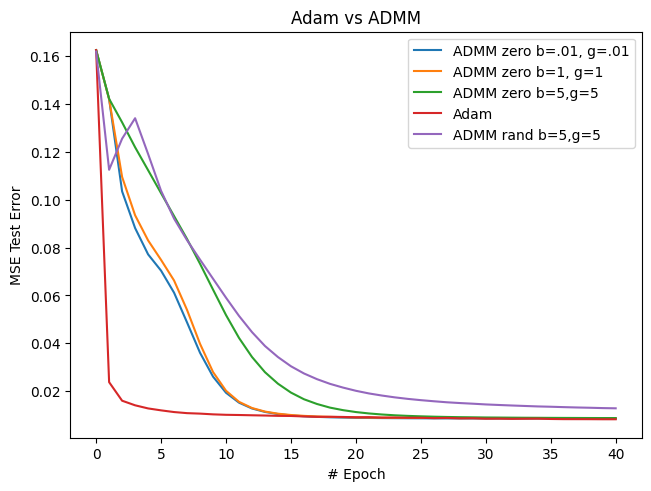

In [42]:
fig, ax = plt.subplots(layout='constrained')


# secax = ax.secondary_yaxis('right', functions=(forward, inverse))
# secax.set_ylabel('Norm of lambda')
# ax.plot(lmbd_norms)

plt.plot(history, label='ADMM zero b=.01, g=.01')
plt.plot(admm_history_zero_g1, label='ADMM zero b=1, g=1')
plt.plot(admm_history_zero_w20, label='ADMM zero b=5,g=5')
plt.plot(adam_history, label='Adam')
plt.plot(admm_history_random, label='ADMM rand b=5,g=5')
plt.title('Adam vs ADMM')
plt.xlabel('# Epoch')
plt.ylabel('MSE Test Error')
plt.legend()
plt.show()

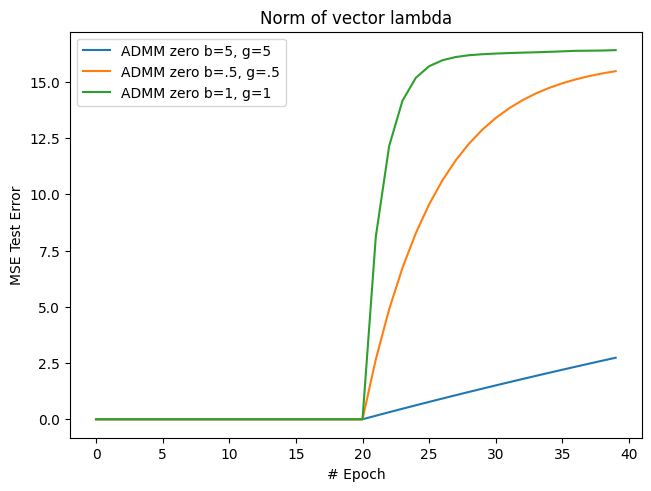

In [46]:
fig, ax = plt.subplots(layout='constrained')


# secax = ax.secondary_yaxis('right', functions=(forward, inverse))
# secax.set_ylabel('Norm of lambda')
# ax.plot(lmbd_norms)

plt.plot(lmbd_norms, label='ADMM zero b=5, g=5')
plt.plot(lmbd_norms_g_5, label='ADMM zero b=.5, g=.5')
plt.plot(lmbd_norms_g1, label='ADMM zero b=1, g=1')
plt.title('Norm of vector lambda')
plt.xlabel('# Epoch')
plt.ylabel('MSE Test Error')
plt.legend()
plt.show()

In [32]:
lmbd_norms_g_5 = [0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.667522430419922,
 4.885455131530762,
 6.732069492340088,
 8.270471572875977,
 9.55252742767334,
 10.621086120605469,
 11.511903762817383,
 12.254315376281738,
 12.8729887008667,
 13.388842582702637,
 13.81903076171875,
 14.177146911621094,
 14.475723266601562,
 14.724414825439453,
 14.931890487670898,
 15.104995727539062,
 15.249467849731445,
 15.369873046875,
 15.47022819519043]

In [27]:
lmbd_norms_g1 = [0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.123762130737305,
 12.14111614227295,
 14.157962799072266,
 15.17353343963623,
 15.690536499023438,
 15.955960273742676,
 16.099105834960938,
 16.178255081176758,
 16.222339630126953,
 16.252208709716797,
 16.274459838867188,
 16.29341697692871,
 16.309337615966797,
 16.328317642211914,
 16.349821090698242,
 16.374431610107422,
 16.379304885864258,
 16.38686752319336,
 16.404874801635742]

In [41]:
admm_history_zero_g1 = [0.16256071627140045,
 0.14208145439624786,
 0.10955284535884857,
 0.09353302419185638,
 0.0830264762043953,
 0.07486123591661453,
 0.06625521183013916,
 0.05394387245178223,
 0.039771322160959244,
 0.027995100244879723,
 0.020159518346190453,
 0.015534918755292892,
 0.012953102588653564,
 0.01146489568054676,
 0.010580322705209255,
 0.01002911850810051,
 0.00966953206807375,
 0.00942299049347639,
 0.009252573363482952,
 0.009125543758273125,
 0.009033968672156334,
 0.008965020067989826,
 0.008910543285310268,
 0.008867516182363033,
 0.008830871433019638,
 0.008803867734968662,
 0.008779127150774002,
 0.008758991956710815,
 0.008741891011595726,
 0.008727531880140305,
 0.008713112212717533,
 0.008701013401150703,
 0.008690537884831429,
 0.008681454695761204,
 0.008669978938996792,
 0.008662832900881767,
 0.008659250102937222,
 0.008650904521346092,
 0.008640804328024387,
 0.008637571707367897,
 0.008631427772343159]

In [40]:
admm_history_zero_w20 = [0.16256071627140045,
 0.14220617711544037,
 0.13237431645393372,
 0.12196049094200134,
 0.11238104104995728,
 0.1027403399348259,
 0.09320013225078583,
 0.08360361307859421,
 0.07324009388685226,
 0.06245364993810654,
 0.05179760977625847,
 0.04224857687950134,
 0.034285739064216614,
 0.027921821922063828,
 0.023110007867217064,
 0.01939784549176693,
 0.016619140282273293,
 0.014642053283751011,
 0.013121114112436771,
 0.012066218070685863,
 0.011263929307460785,
 0.010679200291633606,
 0.010244552977383137,
 0.009904511272907257,
 0.009661480784416199,
 0.009475300088524818,
 0.009327257983386517,
 0.009210983291268349,
 0.009125654585659504,
 0.009063038975000381,
 0.008997957222163677,
 0.00896237138658762,
 0.008921677246689796,
 0.008885308168828487,
 0.008861072361469269,
 0.008832916617393494,
 0.00881110318005085,
 0.008791375905275345,
 0.00877100508660078,
 0.008757321164011955,
 0.008745069615542889]

In [39]:
admm_history_random = [0.16194751858711243,
 0.11254023760557175,
 0.12554298341274261,
 0.13409538567066193,
 0.11915652453899384,
 0.10373768955469131,
 0.09213423728942871,
 0.08310061693191528,
 0.07497549057006836,
 0.06699498742818832,
 0.059052277356386185,
 0.051457930356264114,
 0.04467888921499252,
 0.03886593133211136,
 0.0342458039522171,
 0.030403757467865944,
 0.027398940175771713,
 0.025022773072123528,
 0.023062260821461678,
 0.021502694115042686,
 0.020152995362877846,
 0.019047508016228676,
 0.018165772780776024,
 0.01740044541656971,
 0.016766030341386795,
 0.016235940158367157,
 0.015776656568050385,
 0.01534970011562109,
 0.015029573813080788,
 0.014755377545952797,
 0.014449745416641235,
 0.014221161603927612,
 0.01400614995509386,
 0.013808786869049072,
 0.013615360483527184,
 0.013485065661370754,
 0.013322076760232449,
 0.013177772052586079,
 0.013062233105301857,
 0.012920819222927094,
 0.012827200815081596]

In [38]:
adam_history = [0.16254940629005432,
 0.023760829120874405,
 0.016004661098122597,
 0.014084870927035809,
 0.012780304998159409,
 0.011970746330916882,
 0.01126361358910799,
 0.010807299986481667,
 0.010611305013298988,
 0.01030286680907011,
 0.010113365948200226,
 0.010030188597738743,
 0.009916472248733044,
 0.009811135940253735,
 0.00967424176633358,
 0.009626956656575203,
 0.00942172110080719,
 0.009266742505133152,
 0.009282417595386505,
 0.009214953519403934,
 0.009085607714951038,
 0.009124092757701874,
 0.008946041576564312,
 0.008970675989985466,
 0.008886248804628849,
 0.008876477368175983,
 0.00871405191719532,
 0.00881516095250845,
 0.008634080179035664,
 0.008680612780153751,
 0.008490144275128841,
 0.00852028839290142,
 0.008434571325778961,
 0.00848442129790783,
 0.00852308701723814,
 0.008365979418158531,
 0.008301209658384323,
 0.008292445912957191,
 0.008282369934022427,
 0.008252878673374653,
 0.008249187842011452]